In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Veri setini yükleme
df = pd.read_csv('/kaggle/input/pokmon-base-stats-dataset/pokemon_combined.csv')

In [3]:
#veri setine genel bakış
print("Veri seti bilgisi:")
print(df.info())
print("\nEksik veriler:")
print(df.isnull().sum())

Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1014 non-null   object 
 1   Type             1014 non-null   object 
 2   Species          1014 non-null   object 
 3   Height           1014 non-null   float64
 4   Weight           1014 non-null   float64
 5   Abilities        1014 non-null   object 
 6   Catch rate       1014 non-null   int64  
 7   Base Friendship  1014 non-null   int64  
 8   Base Exp.        1014 non-null   int64  
 9   Growth Rate      1014 non-null   object 
 10  Gender           1014 non-null   object 
 11  HP               1014 non-null   int64  
 12  Attack           1014 non-null   int64  
 13  Defense          1014 non-null   int64  
 14  Sp. Atk          1014 non-null   int64  
 15  Sp. Def          1014 non-null   int64  
 16  Speed            1014 non-null   int64  


In [4]:
df.head()

,Name,Type,Species,Height,Weight,Abilities,Catch rate,Base Friendship,Base Exp.,Growth Rate,Gender,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass Poison,Seed Pokémon,0.7,6.9,1. OvergrowChlorophyll (hidden ability),45,50,64,Medium Slow,"87.5% male, 12.5% female",45,49,49,65,65,45
1,Ivysaur,Grass Poison,Seed Pokémon,1.0,13.0,1. OvergrowChlorophyll (hidden ability),45,50,142,Medium Slow,"87.5% male, 12.5% female",60,62,63,80,80,60
2,Venusaur,Grass Poison,Seed Pokémon,2.4,155.5,Thick Fat,45,50,281,Medium Slow,"87.5% male, 12.5% female",80,100,123,122,120,80
3,Charmander,Fire,Lizard Pokémon,0.6,8.5,1. BlazeSolar Power (hidden ability),45,50,62,Medium Slow,"87.5% male, 12.5% female",39,52,43,60,50,65
4,Charmeleon,Fire,Flame Pokémon,1.1,19.0,1. BlazeSolar Power (hidden ability),45,50,142,Medium Slow,"87.5% male, 12.5% female",58,64,58,80,65,80


In [5]:
#kategorik sütunları sayısallaştırma
le=LabelEncoder()
kategorik = ['Type', 'Species', 'Abilities', 'Growth Rate', 'Gender']
for col in kategorik:
    df[col]= le.fit_transform(df[col])

In [6]:
#veriyi kontrol etme
print("\nKategorik sütunlar kodlandıktan sonra ilk 5 satır:")
print(df[kategorik].head())


Kategorik sütunlar kodlandıktan sonra ilk 5 satır:
   Type  Species  Abilities  Growth Rate  Gender
0   111      544        261            4       6
1   111      544        261            4       6
2   111      544        642            4       6
3    71      363         26            4       6
4    71      227         26            4       6


In [7]:
# Veriyi kaydetme
df.to_csv('encoded_pokemon_data.csv', index=False)
print("\nKodlanmış veri 'encoded_pokemon_data.csv' olarak kaydedildi.")


Kodlanmış veri 'encoded_pokemon_data.csv' olarak kaydedildi.


In [8]:
# Kodlanmış veri setini yükleme
df = pd.read_csv('encoded_pokemon_data.csv')

In [9]:
#aykırı değer kontrolü
q1= df['Attack'].quantile(0.25)
q3= df['Attack'].quantile(0.75)
iqr = q3 - q1
lower_bound= q1 - 1.5 * iqr
upper_bound= q3 + 1.5 * iqr
df = df[(df['Attack'] >= lower_bound) & (df['Attack'] <= upper_bound)]


In [10]:
#temizlenmiş veri seti boyutu
print("\nAykırı değerler temizlendikten sonra veri seti boyutu:", df.shape)


Aykırı değerler temizlendikten sonra veri seti boyutu: (1008, 17)


In [11]:
#veriyi kaydetme
df.to_csv("outlier_cleaned_pokemon_data.csv", index=False)
print("\nAykırı değerler temizlenmiş veri 'outlier_cleaned_pokemon_data.csv' olarak kaydedildi.")


Aykırı değerler temizlenmiş veri 'outlier_cleaned_pokemon_data.csv' olarak kaydedildi.


In [12]:
# Aykırı değerleri temizlenmiş veri setini yükleme
df = pd.read_csv('outlier_cleaned_pokemon_data.csv')

In [13]:
# Sayısal sütunları seçme
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height', 'Weight']

In [14]:
#ölçeklendirme
scaler= StandardScaler()
df[numeric_cols]= scaler.fit_transform(df[numeric_cols])

In [15]:
#ölçeklenmiş veriyi kontrol etme
print("\nÖlçeklenmiş sayısal sütunlar:")
print(df[numeric_cols].head())


Ölçeklenmiş sayısal sütunlar:
         HP    Attack   Defense   Sp. Atk   Sp. Def     Speed    Height  \
0 -0.922166 -0.959530 -0.802372 -0.203257 -0.215512 -0.759392 -0.191705   
1 -0.378870 -0.544077 -0.346072  0.267305  0.323892 -0.263130 -0.102118   
2  0.345525  0.670323  1.609497  1.584879  1.762303  0.398552  0.315953   
3 -1.139485 -0.863656 -0.997929 -0.360111 -0.754916 -0.097710 -0.221567   
4 -0.451310 -0.480161 -0.509036  0.267305 -0.215512  0.398552 -0.072256   

     Weight  
0 -0.492980  
1 -0.445548  
2  0.662495  
3 -0.480539  
4 -0.398894  


In [16]:
# Veriyi kaydetme
df.to_csv('scaled_pokemon_data.csv', index=False)
print("\nÖlçeklenmiş veri 'scaled_pokemon_data.csv' olarak kaydedildi.")


Ölçeklenmiş veri 'scaled_pokemon_data.csv' olarak kaydedildi.


In [17]:
# Ölçeklenmiş veri setini yükleme
df = pd.read_csv('scaled_pokemon_data.csv')

In [18]:
# Yeni özellik: Toplam güç (ölçeklenmiş savaş istatistiklerinin toplamı)
df['Total_Power'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

In [19]:
# Yeni özelliği kontrol etme
print("\nToplam Güç Sütunu (İlk 5 Satır):")
print(df[['Name', 'Total_Power']].head())


Toplam Güç Sütunu (İlk 5 Satır):
         Name  Total_Power
0   Bulbasaur    -3.862229
1     Ivysaur    -0.940952
2    Venusaur     6.371080
3  Charmander    -4.213806
4  Charmeleon    -0.990162


In [20]:
# Veriyi kaydetme
df.to_csv('feature_engineered_pokemon_data.csv', index=False)
print("\nYeni özellik eklenmiş veri 'feature_engineered_pokemon_data.csv' olarak kaydedildi.")


Yeni özellik eklenmiş veri 'feature_engineered_pokemon_data.csv' olarak kaydedildi.


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('feature_engineered_pokemon_data.csv')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


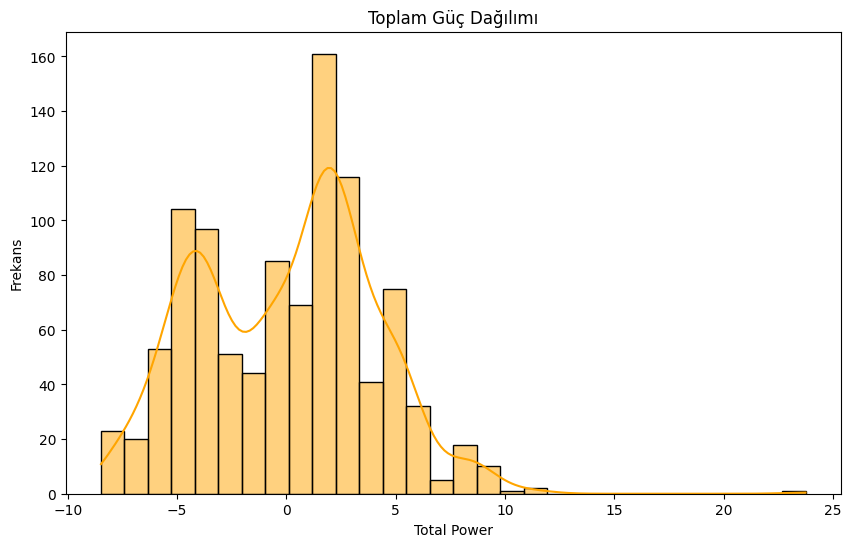

(None,)

In [23]:
#toplam güç dağılımı
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Power'], bins=30, kde=True, color='orange')
plt.title('Toplam Güç Dağılımı')
plt.xlabel('Total Power')
plt.ylabel('Frekans')
plt.savefig('total_power_distribution.png')
plt.show(),

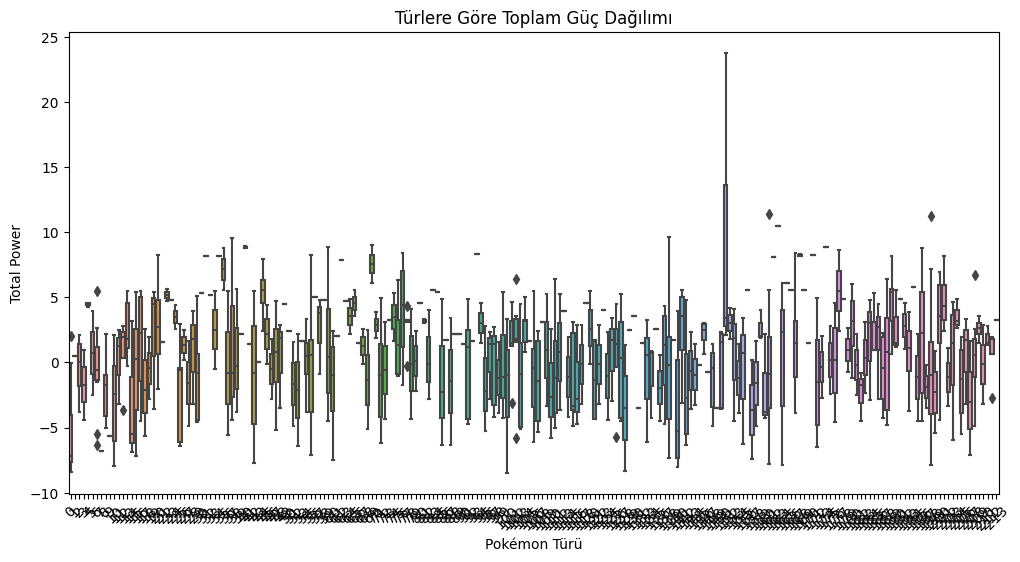

(None,)

In [24]:
# Tür bazlı toplam güç 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Total_Power', data=df)
plt.title('Türlere Göre Toplam Güç Dağılımı')
plt.xlabel('Pokémon Türü')
plt.ylabel('Total Power')
plt.xticks(rotation=45)
plt.savefig('type_total_power_boxplot.png')
plt.show(),

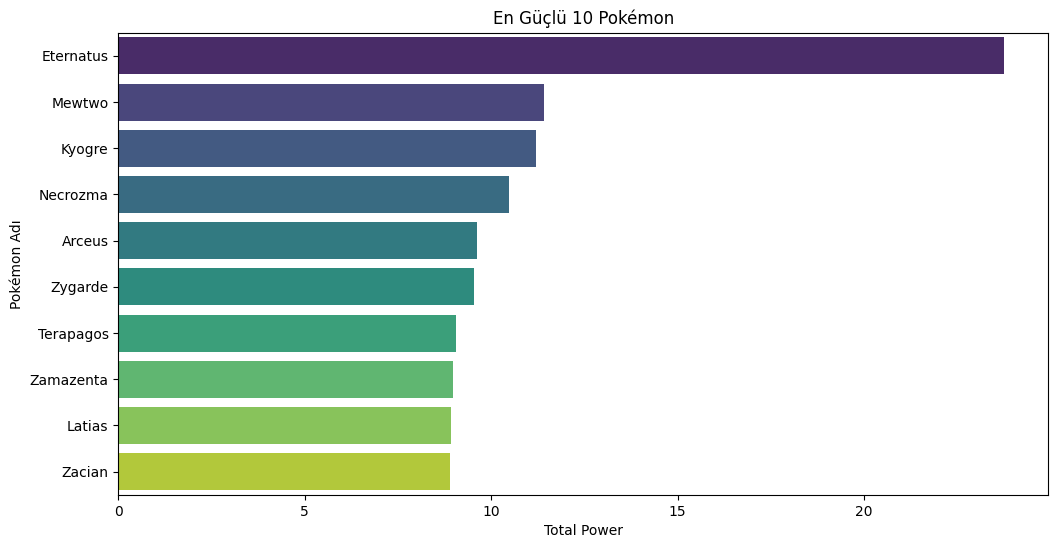

(None,)

In [25]:
# En güçlü 10 Pokémon 
top_pokemon = df[['Name', 'Total_Power']].sort_values(by='Total_Power', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Power', y='Name', data=top_pokemon, palette='viridis')
plt.title('En Güçlü 10 Pokémon')
plt.xlabel('Total Power')
plt.ylabel('Pokémon Adı')
plt.savefig('top_10_pokemon.png')
plt.show(),

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Veri setini yükleme
df = pd.read_csv('feature_engineered_pokemon_data.csv')

In [28]:
# Özellikler ve hedef değişken
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height', 'Weight', 'Type']]
y = df['Total_Power']

In [29]:
# Eğitim ve test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model eğitimi
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nOrtalama Kare Hata (MSE):", mse)
print("R² Skoru:", r2)


Ortalama Kare Hata (MSE): 2.5040480868269052e-28
R² Skoru: 1.0


# Pokémon Base Stats: Comprehensive Data Preprocessing and Analysis

## Introduction
This notebook demonstrates a comprehensive data preprocessing pipeline using the Pokémon Base Stats Dataset. The dataset contains 1014 Pokémon with 17 features, including categorical (e.g., Type, Species) and numerical (e.g., HP, Attack) columns. The goal is to preprocess the data, perform exploratory analysis, and build a simple machine learning model to predict Pokémon strength.

## Dataset Overview

- **Size**: 1014 rows, 17 columns  
- **Categorical Columns**: Name, Type, Species, Abilities, Growth Rate, Gender  
- **Numerical Columns**: Height, Weight, Catch rate, Base Friendship, Base Exp., HP, Attack, Defense, Sp. Atk, Sp. Def, Speed  
- **Missing Values**: None, as confirmed by initial exploration.

## Preprocessing Steps

### 1. Categorical Data Encoding
Categorical columns (Type, Species, Abilities, Growth Rate, Gender) were encoded using LabelEncoder to convert text data into numerical values for machine learning compatibility.

**Sample Output (First 5 Rows):**

```

Type  Species  Abilities  Growth Rate  Gender
0   111      544        261            4       6
1   111      544        261            4       6
2   111      544        642            4       6
3    71      363         26            4       6
4    71      227         26            4       6

```

**Output File**: `encoded_pokemon_data.csv`

### 2. Outlier Detection and Cleaning
Outliers in the Attack column were removed using the Interquartile Range (IQR) method. After cleaning, the dataset size reduced from 1014 to 1008 rows.

**Output:**

```

Dataset size after outlier removal: (1008, 17)

```

**Output File**: `outlier_cleaned_pokemon_data.csv`

### 3. Feature Scaling
Numerical columns (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Height, Weight) were standardized using StandardScaler to have a mean of 0 and a standard deviation of 1.

**Sample Output (First 5 Rows):**

```

```
     HP    Attack   Defense   Sp. Atk   Sp. Def     Speed    Height    Weight
```

0 -0.922166 -0.959530 -0.802372 -0.203257 -0.215512 -0.759392 -0.191705 -0.492980
1 -0.378870 -0.544077 -0.346072  0.267305  0.323892 -0.263130 -0.102118 -0.445548
2  0.345525  0.670323  1.609497  1.584879  1.762303  0.398552  0.315953  0.662495
3 -1.139485 -0.863656 -0.997929 -0.360111 -0.754916 -0.097710 -0.221567 -0.480539
4 -0.451310 -0.480161 -0.509036  0.267305 -0.215512  0.398552 -0.072256 -0.398894

```

**Output File**: `scaled_pokemon_data.csv`

### 4. Feature Engineering
A new feature, Total_Power, was created by summing the scaled battle stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed).

**Sample Output (First 5 Rows):**

```

```
     Name  Total_Power
```

0   Bulbasaur    -3.862229
1     Ivysaur    -0.940952
2    Venusaur     6.371080
3  Charmander    -4.213806
4  Charmeleon    -0.990162

```

**Output File**: `feature_engineered_pokemon_data.csv`

### 5. Data Visualization
Three visualizations were created to explore the data:

- Histogram of Total Power: Shows the distribution of Total_Power.
- Box Plot of Total Power by Type: Compares Total_Power across Pokémon types.
- Bar Plot of Top 10 Pokémon: Lists the top 10 Pokémon by Total_Power (Eternatus was the strongest).

**Output Files:**

- `total_power_distribution.png`
- `type_total_power_boxplot.png`
- `top_10_pokemon.png`

### 6. Machine Learning: Linear Regression
A linear regression model was trained to predict Total_Power using features HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Height, Weight, and Type. The dataset was split into 80% training and 20% testing.

**Results:**

- Mean Squared Error (MSE): 2.504e-28 (near zero, indicating perfect predictions)  
- R² Score: 1.0 (perfect fit, as Total_Power is a direct sum of battle stats)

This perfect performance is expected since Total_Power is a linear combination of the input features.

## Conclusion
This notebook covered a comprehensive data preprocessing pipeline, including categorical encoding, outlier removal, feature scaling, feature engineering, visualization, and a simple machine learning model. The results demonstrate a clean and well-prepared dataset, with Eternatus identified as the strongest Pokémon based on Total_Power.

**Future work could include:**

- Predicting other features (e.g., Type classification).  
- Using One-Hot Encoding for categorical variables.  
- Exploring additional visualizations (e.g., Height vs. Weight scatter plot).
```